<a href="https://colab.research.google.com/github/nickwong8838/-/blob/main/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 创建数据字典
data = {
    '名称': ['印度孟买指数', '标普500', '黄金', '日经225','纳斯达克100'],
    '平均值': [0.1610, 0.0913, 0.0832, 0.0695, 0.1823],
    '标准差': [0.3030, 0.1643, 0.1070, 0.2091, 0.3162],
    '相关系数': [0.5647, 1.0, 0.0036, 0.5243, 0.3162]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 显示数据集
print(df)

        名称     平均值     标准差    相关系数
0   印度孟买指数  0.1610  0.3030  0.5647
1    标普500  0.0913  0.1643  1.0000
2       黄金  0.0832  0.1070  0.0036
3    日经225  0.0695  0.2091  0.5243
4  纳斯达克100  0.1823  0.3162  0.3162


In [ ]:
# 定义投资组合的权重
weights = {
    '印度孟买指数': 0.4,  # 假设权重为 40%
    '标普500': 0.3,        # 假设权重为 30%
    '黄金': 0.1,           # 假设权重为 20%
    '日经225': 0.15,       # 假设权重为 5%
    '纳斯达克100': 0.05   # 假设权重为 5%
}

# 将权重添加到 DataFrame
df['权重'] = df['名称'].map(weights)

# 显示更新后的数据集
print(df)

        名称     平均值     标准差    相关系数    权重
0   印度孟买指数  0.1610  0.3030  0.5647  0.40
1    标普500  0.0913  0.1643  1.0000  0.30
2       黄金  0.0832  0.1070  0.0036  0.10
3    日经225  0.0695  0.2091  0.5243  0.15
4  纳斯达克100  0.1823  0.3162  0.3162  0.05


In [ ]:
import numpy as np

# 设置步长
step = 0.05

# 定义权重的范围
results = []

# 生成权重组合
for w1 in np.arange(0, 1.01, step):
    for w2 in np.arange(0, 1.01 - w1, step):
        for w3 in np.arange(0, 1.01 - w1 - w2, step):
            w4 = 1 - (w1 + w2 + w3)  # 计算最后一个权重
            if w4 >= 0:  # 确保权重非负
                w5 = 1 - (w1 + w2 + w3 + w4)  # 最后一个权重为美国短期国债的权重

                # 计算组合收益
                portfolio_return = (w1 * df.loc[df['名称'] == '印度孟买指数', '平均值'].values[0] +
                                    w2 * df.loc[df['名称'] == '标普500', '平均值'].values[0] +
                                    w3 * df.loc[df['名称'] == '黄金', '平均值'].values[0] +
                                    w4 * df.loc[df['名称'] == '日经225', '平均值'].values[0] +
                                    w5 * df.loc[df['名称'] == '纳斯达克100', '平均值'].values[0])

                # 计算组合标准差
                portfolio_std = np.sqrt((w1 * df.loc[df['名称'] == '印度孟买指数', '标准差'].values[0])**2 +
                                         (w2 * df.loc[df['名称'] == '标普500', '标准差'].values[0])**2 +
                                         (w3 * df.loc[df['名称'] == '黄金', '标准差'].values[0])**2 +
                                         (w4 * df.loc[df['名称'] == '日经225', '标准差'].values[0])**2 +
                                         (w5 * df.loc[df['名称'] == '纳斯达克100', '标准差'].values[0])**2 +
                                         2 * w1 * w2 * df.loc[df['名称'] == '印度孟买指数', '标准差'].values[0] * df.loc[df['名称'] == '标普500', '标准差'].values[0] * df.loc[df['名称'] == '印度孟买指数', '相关系数'].values[0] +
                                         2 * w1 * w3 * df.loc[df['名称'] == '印度孟买指数', '标准差'].values[0] * df.loc[df['名称'] == '黄金', '标准差'].values[0] * df.loc[df['名称'] == '黄金', '相关系数'].values[0] +
                                         2 * w2 * w3 * df.loc[df['名称'] == '标普500', '标准差'].values[0] * df.loc[df['名称'] == '黄金', '标准差'].values[0] * df.loc[df['名称'] == '标普500', '相关系数'].values[0])

                # 保存结果
                results.append([w1, w2, w3, w4, w5, portfolio_return, portfolio_std])

# 创建结果数据集
results_df = pd.DataFrame(results, columns=['印度孟买指数权重', '标普500权重', '黄金权重', '日经225权重', '美国短期国债权重', '平均收益', '标准差'])

# 显示结果数据集
print(results_df)

      印度孟买指数权重  标普500权重  黄金权重  日经225权重  美国短期国债权重      平均收益       标准差
0         0.00     0.00  0.00     1.00       0.0  0.069500  0.209100
1         0.00     0.00  0.05     0.95       0.0  0.070185  0.198717
2         0.00     0.00  0.10     0.90       0.0  0.070870  0.188494
3         0.00     0.00  0.15     0.85       0.0  0.071555  0.178458
4         0.00     0.00  0.20     0.80       0.0  0.072240  0.168643
...        ...      ...   ...      ...       ...       ...       ...
1752      0.90     0.10  0.00     0.00       0.0  0.154030  0.282304
1753      0.95     0.00  0.00     0.05       0.0  0.156425  0.288040
1754      0.95     0.00  0.05     0.00       0.0  0.157110  0.287919
1755      0.95     0.05  0.00     0.00       0.0  0.157515  0.292568
1756      1.00     0.00  0.00     0.00       0.0  0.161000  0.303000

[1757 rows x 7 columns]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from font(s) DejaVu Sans.
  fig.canvas

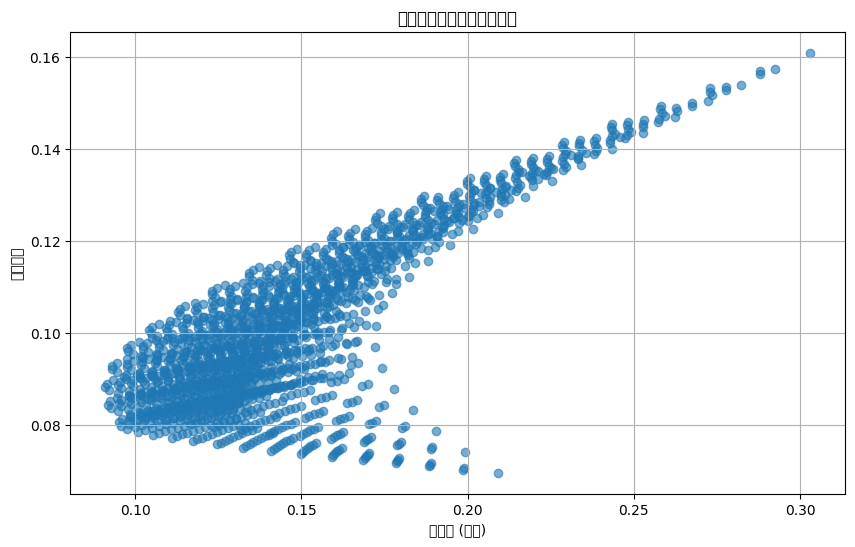

In [ ]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(results_df['标准差'], results_df['平均收益'], alpha=0.6)

# 设置图表标题和标签
plt.title('投资组合收益与风险散点图')
plt.xlabel('标准差 (风险)')
plt.ylabel('平均收益')

# 添加网格
plt.grid()

# 显示图形
plt.show()

In [ ]:
# 1. 找出最小方差的投资组合
min_variance_portfolio = results_df.loc[results_df['标准差'].idxmin()]

# 2. 找出方差约为 0.15、0.2 和 0.25 的收益最大的投资组合
target_variances = [0.15, 0.2, 0.25]
best_portfolios = []

for target_variance in target_variances:
    closest_variance_idx = (results_df['标准差'] - target_variance).abs().idxmin()
    best_portfolios.append(results_df.iloc[closest_variance_idx])

# 3. 计算夏普比率和在险价值
risk_free_rate = 0.04  # 假设无风险利率为 2%
results_summary = []

def calculate_sharpe_ratio(portfolio):
    return (portfolio['平均收益'] - risk_free_rate) / portfolio['标准差']

def calculate_var(portfolio, confidence_level=0.95):
    # VaR 计算为组合收益的分位数
    return -np.percentile(np.random.normal(portfolio['平均收益'], portfolio['标准差'], 10000), (1 - confidence_level) * 100)

# 计算最小方差组合的夏普比率和VaR
min_variance_sharpe = calculate_sharpe_ratio(min_variance_portfolio)
min_variance_var = calculate_var(min_variance_portfolio)

results_summary.append(['最小方差组合', min_variance_portfolio, min_variance_sharpe, min_variance_var])

# 计算特定方差组合的夏普比率和VaR
for portfolio in best_portfolios:
    sharpe_ratio = calculate_sharpe_ratio(portfolio)
    var = calculate_var(portfolio)
    results_summary.append([portfolio['标准差'], portfolio, sharpe_ratio, var])

# 打印结果
for result in results_summary:
    print(f"组合类型: {result[0]}")
    print(f"权重: {result[1][['印度孟买指数权重', '标普500权重', '黄金权重', '日经225权重', '美国短期国债权重']]}")
    print(f"夏普比率: {result[2]:.4f}")
    print(f"在险价值 (VaR): {result[3]:.4f}")
    print("-" * 40)

组合类型: 最小方差组合
权重: 印度孟买指数权重    0.1
标普500权重     0.0
黄金权重        0.7
日经225权重     0.2
美国短期国债权重    0.0
Name: 453, dtype: float64
夏普比率: 0.5297
在险价值 (VaR): 0.0624
----------------------------------------
组合类型: 0.149975
权重: 印度孟买指数权重    0.00
标普500权重     0.75
黄金权重        0.25
日经225权重     0.00
美国短期国债权重    0.00
Name: 215, dtype: float64
夏普比率: 0.3286
在险价值 (VaR): 0.1613
----------------------------------------
组合类型: 0.1999500579394765
权重: 印度孟买指数权重    0.65
标普500权重     0.00
黄金权重        0.25
日经225权重     0.10
美国短期国债权重    0.00
Name: 1644, dtype: float64
夏普比率: 0.4621
在险价值 (VaR): 0.1942
----------------------------------------
组合类型: 0.24911443503016842
权重: 印度孟买指数权重    0.80
标普500权重     0.05
黄金权重        0.00
日经225权重     0.15
美国短期国债权重    0.00
Name: 1728, dtype: float64
夏普比率: 0.4166
在险价值 (VaR): 0.2664
----------------------------------------


<ipython-input-26-0aac3ed4bff2>:27: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 调整布局以防止标签重叠
<ipython-input-26-0aac3ed4bff2>:27: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 调整布局以防止标签重叠
<ipython-input-26-0aac3ed4bff2>:27: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 调整布局以防止标签重叠
<ipython-input-26-0aac3ed4bff2>:27: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 调整布局以防止标签重叠
<ipython-input-26-0aac3ed4bff2>:27: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 调整布局以防止标签重叠
<ipython-input-26-0aac3ed4bff2>:27: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 调整布局以防止标签重叠
<ipython-input-2

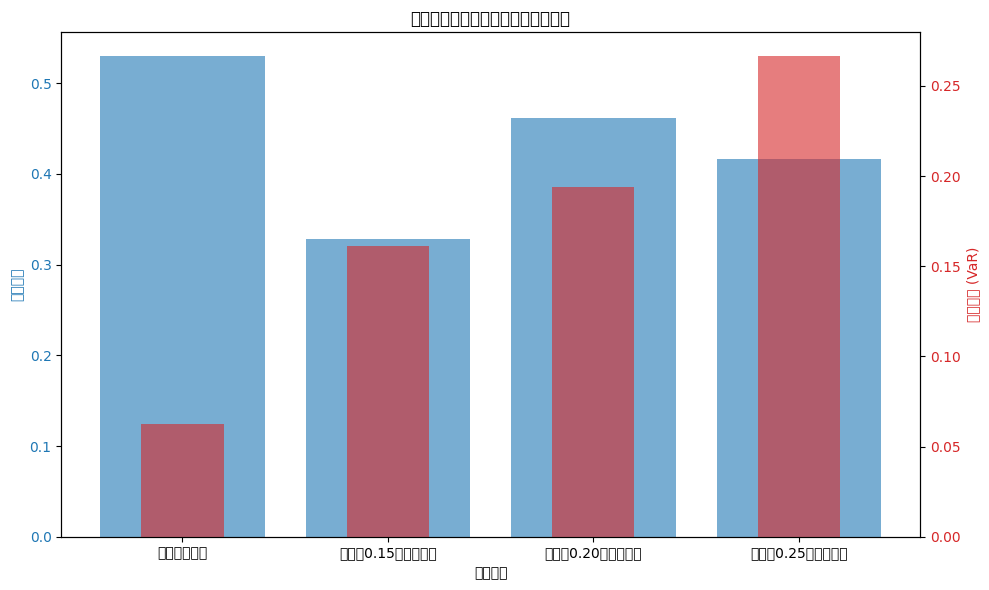

In [ ]:
import matplotlib.pyplot as plt

# 准备数据
labels = ['最小方差组合'] + [f'方差约{var:.2f}的最佳组合' for var in [0.15, 0.2, 0.25]]
sharpe_ratios = [min_variance_sharpe] + [result[2] for result in results_summary[1:]]
vars = [min_variance_var] + [result[3] for result in results_summary[1:]]

# 创建柱形图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制夏普比率
color = 'tab:blue'
ax1.set_xlabel('投资组合')
ax1.set_ylabel('夏普比率', color=color)
ax1.bar(labels, sharpe_ratios, color=color, alpha=0.6, label='夏普比率')
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个 Y 轴
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('在险价值 (VaR)', color=color)
ax2.bar(labels, vars, color=color, alpha=0.6, label='在险价值', width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

# 设置标题
plt.title('投资组合夏普比率与在险价值柱形图')
fig.tight_layout()  # 调整布局以防止标签重叠
plt.show()

In [ ]:
# 查找组合编号为 1644 的投资组合
portfolio_1644 = results_df.iloc[1644]

# 打印组合权重、平均收益和方差
print("组合 1644 的信息:")
print(f"权重: {portfolio_1644[['印度孟买指数权重', '标普500权重', '黄金权重', '日经225权重', '美国短期国债权重']]}")
print(f"平均收益: {portfolio_1644['平均收益']:.4f}")
print(f"标准差: {portfolio_1644['标准差']:.4f}")

组合 1644 的信息:
权重: 印度孟买指数权重    0.65
标普500权重     0.00
黄金权重        0.25
日经225权重     0.10
美国短期国债权重    0.00
Name: 1644, dtype: float64
平均收益: 0.1324
标准差: 0.2000
